In [1]:
!pip install mlxtend


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [6]:
books=pd.read_csv("C:\\Users\\hp\\Downloads\\book (1).csv")

In [45]:
frequent_items = apriori(books, min_support = 0.005,max_len = 3, use_colnames = True)

frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(ItalCook, GeogBks, Florence)"
220,0.0115,"(GeogBks, ItalArt, ItalAtlas)"
221,0.0090,"(GeogBks, ItalArt, Florence)"
222,0.0125,"(ItalCook, ItalArt, ItalAtlas)"


In [8]:
## Most frequent items set based on support  
frequent_items.sort_values('support',ascending= False, inplace = True)

In [9]:
##Building the rules
rules = association_rules(frequent_items,metric="lift",min_threshold = 1)


In [10]:
##The above code gives us the rules with threshold greater than 1
rules.sort_values('lift', ascending = False, inplace = True)

In [11]:
## To eliminate the reducdancy in rules
def to_list(i):
    return sorted(i)

ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_x = ma_x.apply(sorted)

return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]

index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))


In [12]:
##Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules, : ]

In [13]:
##Sorting them with respect to lift 
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)


C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
### to see only top 10
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
355,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
560,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
565,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
921,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


Text(0.5, 0, 'lift')

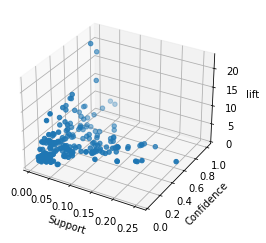

In [15]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")


Text(0, 0.5, 'confidence')

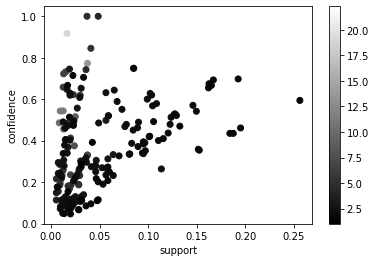

In [16]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

In [17]:
##Total number of rules are 212, wuth minimum support = 0.005 and maximum length = 4 , which are without any reducdancies


In [18]:
## Changing the support value to 0.007

In [41]:
frequent_items1 = apriori(books,min_support = 0.007,max_len = 4 , use_colnames = True)

frequent_items1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
466,0.0090,"(ArtBks, GeogBks, ItalArt, Florence)"
467,0.0125,"(ArtBks, ItalCook, ItalArt, ItalAtlas)"
468,0.0095,"(ArtBks, ItalCook, ItalArt, Florence)"
469,0.0090,"(GeogBks, ItalCook, ItalArt, ItalAtlas)"


In [20]:
#Most frequent items based on the support, decending order
frequent_items1.sort_values('support', ascending = False, inplace = True)


In [21]:
#Building rules
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)

In [22]:
##Rules2 are the rules which are generated with the minimum threshold as 1
rules2.sort_values('lift',ascending = False , inplace = True)


In [24]:
###Elimiinating the reducdancies

def to_list1(i):
    return(sorted(i))

ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)

ma_x1 = ma_x1.apply(sorted)

return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]

index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [25]:
## eliminate rules with reducdancies 
rules_without_reduc = rules2.iloc[index_rules1,:]


In [40]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2157,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2160,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3317,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3312,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3122,"(ItalCook, ItalAtlas)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667


In [26]:
##Sorting the rules
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)
### A Total of 459 rules

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 0, 'lift')

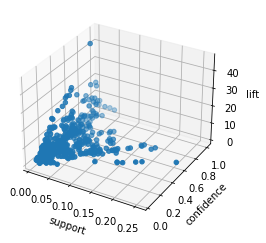

In [27]:
## 3D plots
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

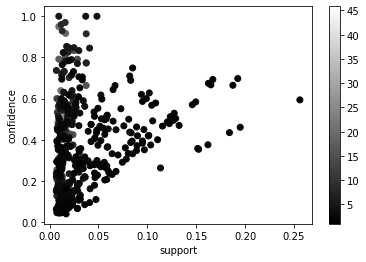

In [28]:
## Scatter plot
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [29]:

############# Changing the minimum support value to 0.6 and maximum length = 3

In [42]:
frequent_items2 = apriori(books, min_support = 0.1 , max_len = 3,use_colnames = True)
frequent_items2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [31]:
## Sorting the rules is decending order
frequent_items2.sort_values('support', ascending = False, inplace = True)

In [32]:
## Building the rules 
rules3 = association_rules(frequent_items2, metric = 'lift', min_threshold = 1 )

rules3.sort_values('lift', ascending = False, inplace = True )

In [33]:
### To remove the reducdancies
def to_list3(i):
    return(sorted(i))
    
max_x2 = rules3.antecedents.apply(to_list3)+rules3.consequents.apply(to_list3)

max_x2 = max_x2.apply(sorted)

In [35]:
### to find unique rules

return_rules3 = list(max_x2)
unique_rules3 = [list(m) for m in set(tuple(i) for i in return_rules3)]
index_rules3=[]
for i in unique_rules3:
    index_rules3.append(return_rules3.index(i))

In [44]:
## removing reducdancies
rules_without_reduc1 = rules3.iloc[index_rules3,:]  
rules_without_reduc1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
19,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
72,(RefBks),(DoItYBks),0.2145,0.2820,0.1055,0.491841,1.744119,0.045011,1.412945
71,(GeogBks),"(CookBks, DoItYBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
45,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
59,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
27,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
38,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
86,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628


In [43]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
63,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
86,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
91,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
96,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
16,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
17,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [37]:
## Sorting these rules
rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)
## A total of 30 rules are formed.

Text(0.5, 0, 'lift')

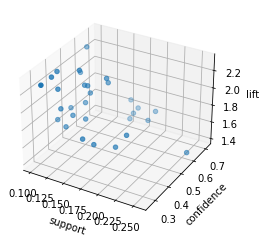

In [38]:
# 3D plots
support3 = rules_without_reduc1["support"]
confidence3 = rules_without_reduc1["confidence"]
lift3 = rules_without_reduc1["lift"]

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(support3,confidence3,lift3)
ax3.set_xlabel("support")
ax3.set_ylabel("confidence")
ax3.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

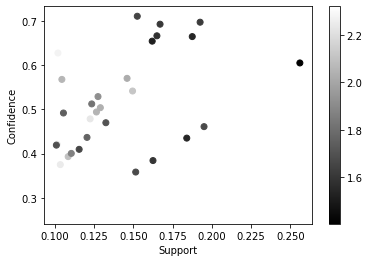

In [39]:
## Scatter plot
plt.scatter(support3, confidence3, c=lift3 , cmap='gray')
plt.colorbar()
plt.xlabel("Support");plt.ylabel("Confidence")